# Project: Investigate a Dataset - TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>In this Notebook it is described the analysis of a data set about movies. The data set contains information about ten thousend movies collected from The Movie Database (TMDb). It is interesting because it includes user ratings and revenue.

>The Database is summarized in a table stored in one CSV file. The 21 fields or columns in which the table is based on are listed below:

>  - **id**: It is the unique identifier of each record.
>  - **imdb_id**: It is another identifier.
>  - **popularity**: This field shows the popularity of the film.
>  - **budget**: It contains the budget of the film.
>  - **revenue**: Shows the revenue obtained with the film.
>  - **original_title**: It is the original title of the film.
>  - **cast**: It is a list of the actors which participate in the film. The names of the actors are separated by "|".
>  - **homepage**: It contains a link to a website in which more information of the film cna be obtained. Some of the records appear empty.
>  - **director**: It is the directo's name.
>  - **tagline**: It is the subtitle of the film.
>  - **keywords**: It contains a list of keywors referred to the film contain. The keywords are separated by "|".
>  - **overview**: It is a brief summary of the film.
>  - **runtime**: Contains the number of minutes that the film takes.
>  - **genres**: A list of the different genres in which the film could be included. Genres are separated here by "|".
>  - **production_companies**: A list of the companies that porduced the film, separated by "|".
>  - **release_date**: The date of the film's premiere.
>  - **vote_count**: Number of votes that it has on the platform.
>  - **vote_average**: Average of the votes in the platform.
>  - **release_year**: Year in which the film was released.
>  - **budget_adj**: Budget of the film adjusted in time to value of money in 2010.
>  - **revenue_adj**: Revenue obtained by the film adjusted in time to value of money in 2010.


### Question(s) for Analysis

> There are provided some example questions listed below:

> - Which genres are most popular from year to year?
> - What kinds of properties are associated with movies that have high revenues?

> Thus, trying to answer previous questions, it can be noted that there is a list of fields without any interest: id, imdb_id, homepage, tagline and overview.

> Moreover, I would like to know if there is some relation between budget and revenue. Maybe it can be observed some kind of relation there, but also between budget and average vote.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

% matplotlib inline




In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling


### General Properties


In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# I am going to look at the shape of the data set:

df.shape

(10866, 21)

In [5]:
# We can see that there are more than 10.000 records. Specifically, there are 10.866 records. 
# We can check that there are 21 columns, as it was mentioned earlier.


### Data Cleaning

 

In [6]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


In [7]:
# Now, I am going to ask about info for the data set:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

> The result of previous cell shows us which are those columns in which there is a lack of information.
> Columns **imdb_id**, **cast**, **homepage**, **director**, **tagline**, **keywords**, **overview**, **genres** and **production_companies** have some missing records. However, some of them are not going to be used, as it has been justified earlier.

In [8]:
# So in this cell we are going to drop those columns which are not going to be used in the analysis:

df.drop(['id', 'imdb_id', 'homepage', 'tagline', 'overview'], axis=1, inplace=True)

# Then we check that these columns were droped:

df.head()

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [9]:
# So, let's see again the info:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 16 columns):
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
keywords                9373 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(4), int64(5), object(7)
memory usage: 1.3+ MB


> Now we only have 5 columns in which there is missing information. Of course, for cast, keywords, genres and production_companies, we can not complete the information with an average value or something like that because they are text. However, for the moment, we are going to keep those records with null values in those columns.

> If we want to know which genres are more popular form year to year, we need to separate them, because all the genres comes in one column. It also occurs with keywords and cast, so the solution that we use for genres might be useful for the rest of cases. How can I manage it?

> Well, I guess that the best way to do it is to replicate the same row one time for each of the genres that comes in the record.

In [10]:
# For example, let's see the first row:

df.head(1)

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


> Genres are Action, Adventure, Science, Fiction an Thriller. But if I analyze the dataset as it is, I would be analyzing the set of genres, instead of individual genres. That is the reason why I would like to obtain one row for each genre.

> So, what we are going to do is to obtain a copy of the dataset in which each genre will appear in a row. Let's see how to do it.

In [11]:
# I have checked here how to split a column into different rows: https://stackoverflow.com/questions/17116814/pandas-how-do-i-split-text-in-a-column-into-multiple-rows

# Following that criteria, let's apply it:

# g = df['genres'].str.split('|').apply(Series, 1).stack()

# g.index = g.index.droplevel(-1) # to line up with df's index

# g.name = 'genres' # needs a name to join

# df_genres= df.drop(['genres'], axis=1)
# df_genres = df.join(g)

In [12]:
# In my case it is not working, so I have looked for the error and I have found next solution:

from pandas import Series, DataFrame

# from https://stackoverflow.com/questions/34967021/nameerror-name-series-is-not-defined

In [13]:
# Let's run it again:

g = df['genres'].str.split('|').apply(Series, 1).stack()

g.index = g.index.droplevel(-1) # to line up with df's index

g.name = 'genres' # needs a name to join

df_genres= df.drop(['genres'], axis=1, inplace=False)
df_genres = df.drop(['genres'], axis=1, inplace=False).join(g)

In [14]:
# And let's see first four rows:

df_genres.head(4)

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Adventure
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Science Fiction
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Thriller


> Nice! Now we have the genres sepparated, so we can start it's exploratory analysis.

In [15]:
# Let's do it for keywords too, so we will have it prepared later.

k = df['keywords'].str.split('|').apply(Series, 1).stack()

k.index = k.index.droplevel(-1) # to line up with df's index

k.name = 'keywords' # needs a name to join

df_keywords= df.drop(['keywords'], axis=1, inplace=False)
df_keywords = df.drop(['keywords'], axis=1, inplace=False).join(k)

In [16]:
#Let's see the first rows :

df_keywords.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,keywords
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,monster
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,dna
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,tyrannosaurus rex
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,velociraptor
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,island


<a id='eda'></a>
## Exploratory Data Analysis



### Which genres are most popular from year to year?

In [17]:
# How can we see which genres are most popular from year to year?

> Let's use a line plot:

> What do we need to draw? I would like to obtain a line chart in which the X axis contains years, Y axis shows count of films and each line has to represent a genre. Let's start working on it.

In [18]:
# Let's count the occurrences of each gender:
df_genres.genres.value_counts()

Drama              4761
Comedy             3793
Thriller           2908
Action             2385
Romance            1712
Horror             1637
Adventure          1471
Crime              1355
Family             1231
Science Fiction    1230
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
Name: genres, dtype: int64

In [19]:
# Let's group them by years:
df_genres.groupby(['release_year']).genres.value_counts()

release_year  genres  
1960          Drama       13
              Action       8
              Comedy       8
              Horror       7
              Romance      6
                          ..
2015          Music       33
              TV Movie    20
              History     15
              War          9
              Western      6
Name: genres, Length: 1049, dtype: int64

In [20]:
# Let's create a new dataset:

df_genres_aux = df_genres.groupby(["release_year"]).genres.value_counts().reset_index(name="count")

#Let's see the headers:
df_genres_aux.head()

,release_year,genres,count
0,1960,Drama,13
1,1960,Action,8
2,1960,Comedy,8
3,1960,Horror,7
4,1960,Romance,6


In [21]:
# Let's set as index the release_year:
df_genres_aux.set_index('release_year', inplace=True)

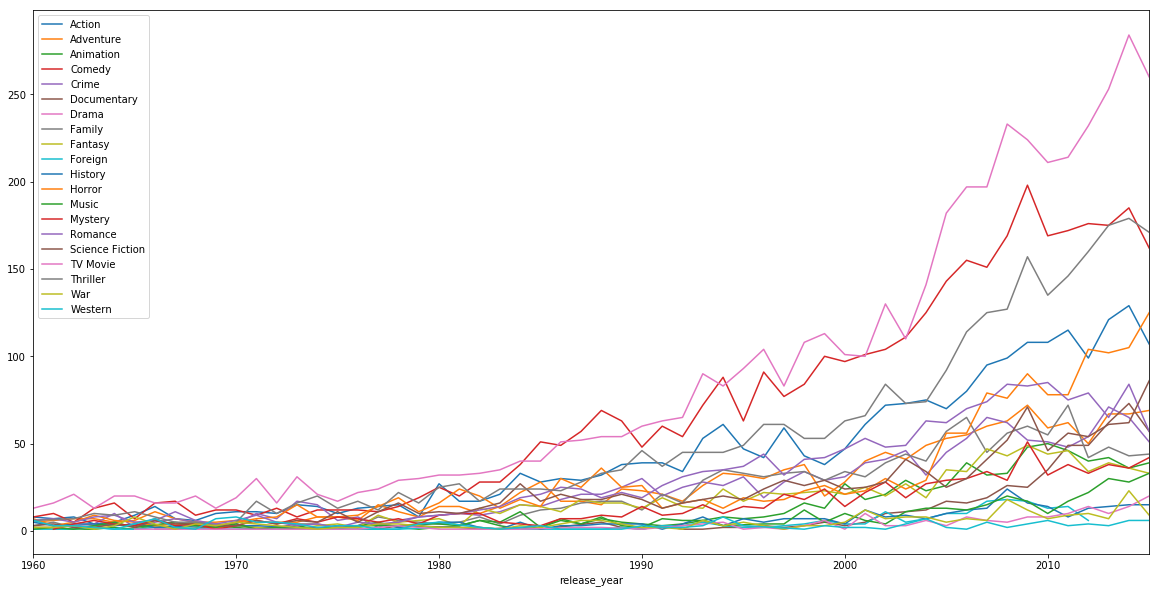

In [22]:
# Let's draw the line chart: 
df_genres_aux.groupby('genres')['count'].plot.line(legend=True, figsize= (20,10));

> In previous line chart we can have an idea of the evolution of genders during years, but it is still not enough to obtain a conclusion. Colours are similar between them.

> Let's improve it:

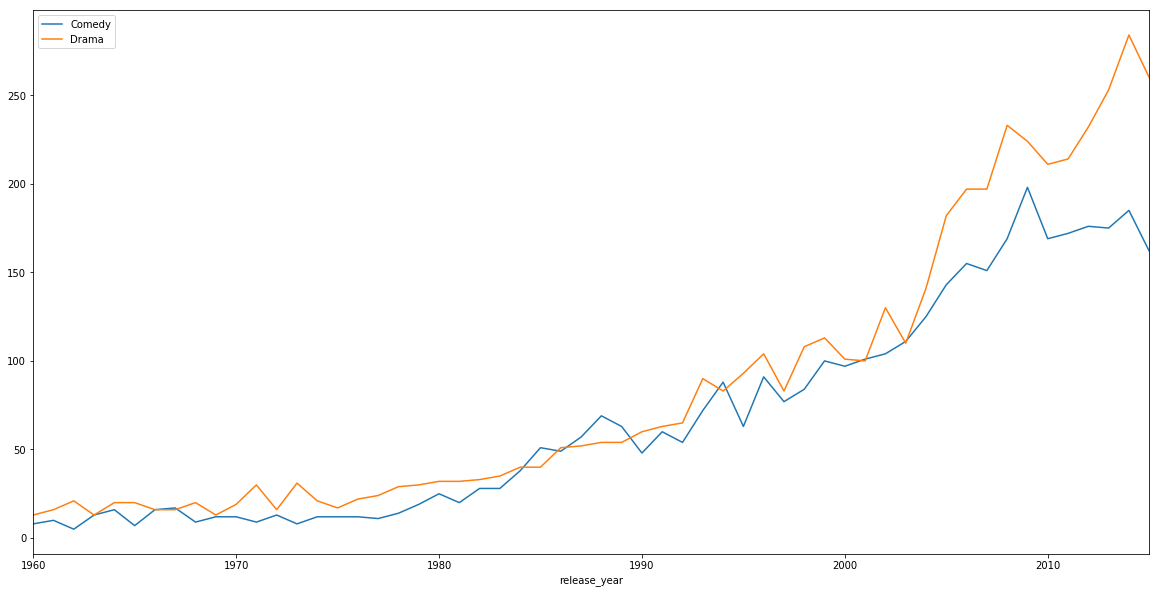

In [23]:
#It seems that Comedy and Drama are the most popular genres during years:

df_genres_aux.query('genres == "Comedy" or genres == "Drama"').groupby('genres')['count'].plot.line(legend=True, figsize= (20,10));

> It is true, Comedy and Drama are the most common genres towards years and in previous graphic we can see how they increase from 1960 to 2010 and onwards years. However, I would like to see which were the most common genres in the sixties:

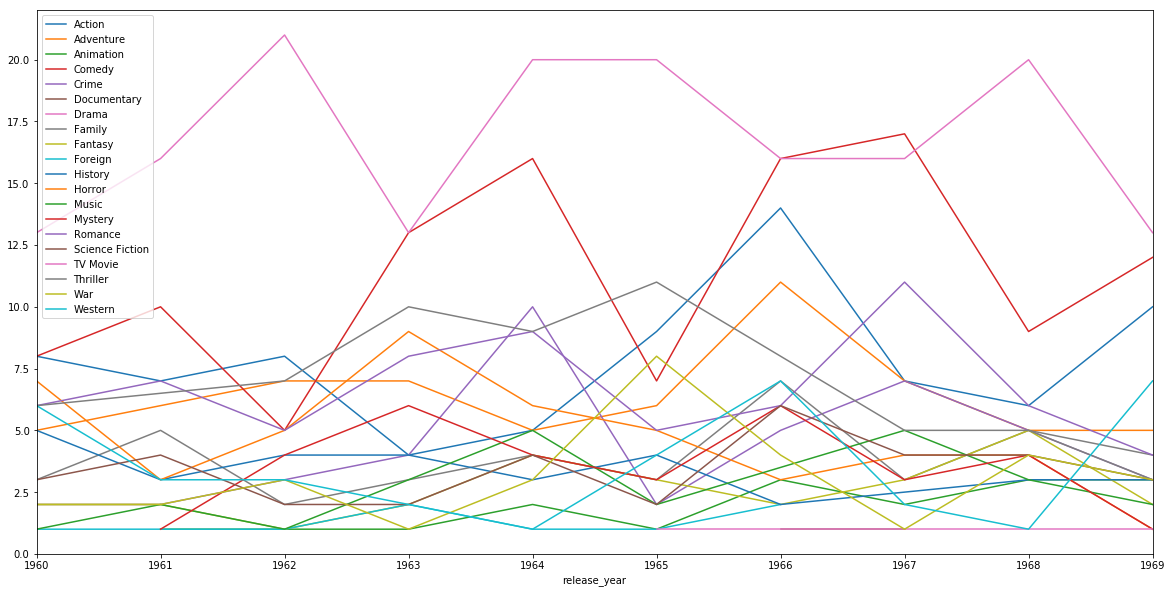

In [24]:
df_genres_aux.query('release_year >= 1960 and release_year <1970').groupby('genres')['count'].plot.line(legend=True, figsize= (20,10));

> It seems that Drama and Comedy have remain as most popular from a lot of years ago. During the first decade in which we have data from released films, Drama and Comedy were the most popular genres, as they are in 2010. Moreover, let's see some numbers:

In [25]:
# Let's see the data ordered by count of films.
df_genres_aux.sort_values(by='count', ascending=False)

,genres,count
release_year,,
2014,Drama,284
2015,Drama,260
2013,Drama,253
2008,Drama,233
2012,Drama,232
2009,Drama,224
2011,Drama,214
2010,Drama,211
2009,Comedy,198


> As expected, Drama and Comedy are the genres with highest films.


### What kinds of properties are associated with movies that have high revenues?

In [26]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


> To see some properties we are going to use keywords, which reflect some features about the film. Thus, I will come back to the data set that I created earlier, in which keywords were separated.

In [27]:
df_keywords.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,keywords
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,monster
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,dna
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,tyrannosaurus rex
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,velociraptor
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,island


> Which are the three most common keywords?

In [28]:
# Let's create a new dataset:

df_keywords_aux = df_keywords.keywords.value_counts().reset_index(name="count")

#Let's see the headers:
df_keywords_aux.head()

,index,count
0,woman director,413
1,independent film,396
2,based on novel,278
3,sex,272
4,sport,216


> The most common keywords are "woman director", "independent film" and "based on novel". However, we don't know how these keywords are related with revenues yet. We would need to obtain the total revenue goruped by keywords. By that we way, we can inference which are the features which increase the revenues of a film.

In [29]:
df_keywords.drop(['popularity', 'budget', 'runtime', 'vote_count','vote_average', 'release_year','budget_adj', 'revenue_adj'], axis=1, inplace=False).groupby('keywords').sum().sort_values(by=['revenue'], ascending=False).head(5)

,revenue
keywords,
based on novel,23651408868
dystopia,15323092491
marvel comic,14133256296
sequel,14006726955
duringcreditsstinger,12991295538


> Then, it can be observed that the keywords which have obtained higher sums of revenues are "based on novel", "dystopia" and "marvel comic".

### What kinds of relations can we observe?

> We could see if there is any relation between budget and revenue or average vote. To do that, the best way is using a scatterplot:


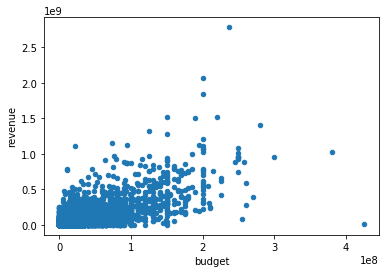

In [30]:
df.plot(x='budget', y= 'revenue', kind = 'scatter');

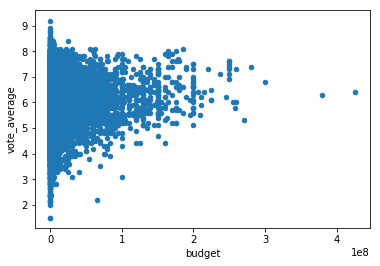

In [31]:
df.plot(x='budget', y= 'vote_average', kind = 'scatter');

> According to previous plots, we can involve that there is a relation between budget and revenue: the higher the budget is, the higher the revenue is. However, it is not always in that way: there are some exceptions. For example, the film with the higher budget obtain a littler revenue, while the film that obtained the higher revenue had a medium budget.

> On the other hand, it doesn't seem to exist a relation between the budget of the film and the vote_average. Higher budgets doesn't obtain higher marks and some films with little budget have a high vote. 

<a id='conclusions'></a>
## Conclusions

> In conclusion, we can summarize that:

- Drama and Comedy have been the most common genres during years.
- Films "based on novel", including "dystopia" or related with "marvel comic" obtain higher revenues than the rest.
- There is a relation between budget and revenue: if a company invests more in a film, they probably obtain more revenue from it.

However, we have to note that there are some limitations in this exploration. The first one is that we have used a little data set. Of course, ten thousend records is a good mark to practice with the knowledge obtained in this module, but conclusions have to be taken with caution. Another limitation is that some of the conclusions have been obtained onlyh using plots. Probably we would have to improve those plots and focus on some specific topics to go deeper in the reflexions of the analysis. For example, the matter about genres can be treated in detail trying to obtain the increase of popularity of each genre towards years, for what we have to calculate percentages of increase from one year to another and later plot them.

In [32]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0